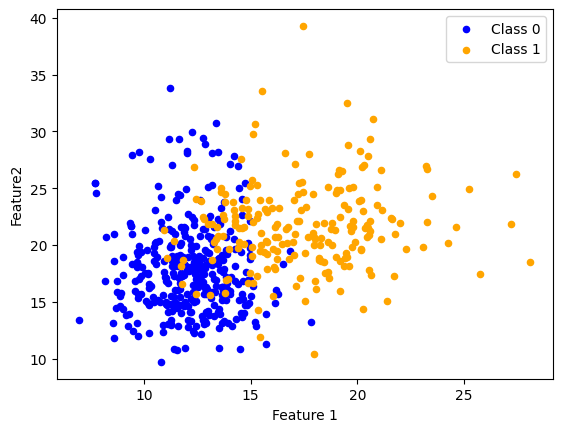

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/nishankrai/Desktop/Practice/Machine Learning/MLfromScratch/data/data.csv')

X_train = df[["radius_mean", "texture_mean"]].values
y_train = df["diagnosis"].values
y_train = (y_train == 'M').astype(int)
m, n = X_train.shape

plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color = "blue", label ="Class 0", s=20)
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color = "orange", label ="Class 1", s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature2")
plt.legend()
plt.show()

In [90]:
def sigmoid(z):
    return 1/ (1+np.exp(-z))


In [91]:
def cost_function(X, y, w, b):
    cost_sum = 0

    for i in range(m):
        z = np.dot(w, X[i]) + b 
        g = sigmoid(z)

        cost_sum += y[i] * np.log(g) - (1-y[i]) * np.log(1-g)

    return (1/m) * cost_sum


In [92]:
def gradient_function(X, y, w, b):
    grad_w = np.zeros(n)
    grad_b = 0

    for i in range(m):
        z = np.dot(w, X[i]) + b
        g = sigmoid(z)

        grad_b += (g-y[i])
        for j in range(n):
            grad_w[j] += (g-y[i]) * X[i, j] 

    grad_b = (1/m) * grad_b
    grad_w = (1/m) * grad_w

    return grad_b, grad_w

    

In [93]:
def gradient_descent(X, y, l, eppochs):
    w = np.zeros(n)
    b = 0

    for i in range(eppochs):
        grad_b, grad_w = gradient_function(X, y, w, b)

        w = w- l * grad_w 
        b = b - l * grad_b

        if i % 1000 == 0:
            print(f"Eppochs {i}, cost: {cost_function(X, y, w, b)}")

    return w,b

    

In [94]:
def predict(X, w, b):
    pred = np.zeros(m)

    for i in range(m):
        z = np.dot(w, X[i]) +b
        g = sigmoid(z)

        pred[i] = 1 if g >= 0.5 else 0

    return pred

In [97]:
learning_rate = 0.01
eppochs = 15000

final_w, final_b = gradient_descent(X_train, y_train, learning_rate, eppochs)

predictions = predict(X_train, final_w, final_b)
accurary = np.mean(predictions==y_train) * 100
print(f"training Accurary {accurary:.2f}%")


Eppochs 0, cost: -0.016349540518522793
Eppochs 1000, cost: 0.04807440567427926
Eppochs 2000, cost: 0.042139746459274915
Eppochs 3000, cost: 0.036737620140934776
Eppochs 4000, cost: 0.03184508833935063
Eppochs 5000, cost: 0.027427273357262954
Eppochs 6000, cost: 0.023443486278138102
Eppochs 7000, cost: 0.01985141910389513
Eppochs 8000, cost: 0.01660977664081682
Eppochs 9000, cost: 0.013679784667073498
Eppochs 10000, cost: 0.011025944727407167
Eppochs 11000, cost: 0.00861630886637199
Eppochs 12000, cost: 0.006422462131669316
Eppochs 13000, cost: 0.004419337231898483
Eppochs 14000, cost: 0.002584941895162778
training Accurary 88.22%


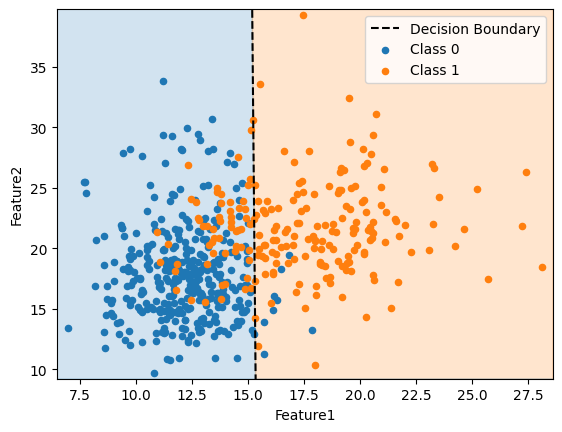

In [98]:
m = -final_w[0] / final_w[1]
c = -final_b / final_w[1]

xmin, xmax = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
ymin, ymax = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xd = np.array([xmin, xmax])
yd = m * xd + c

plt.plot(xd, yd, 'k', ls='--', label='Decision Boundary')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='tab:blue', label='Class 0', s=20)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='tab:orange', label='Class 1', s=20)

plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()
